# Sharpe Ratio

- Representa riesgo y precios return.
- William F. Sharpe: entendimiento del return de una inversión comparada a su riesgo.

$$SR=\frac{r_{p}-r_{f}}{\sigma_{p}}$$
- $r_{p}$ es el precio return.
- $r_{f}$ return libre de riesgo.
- $\sigma_{p}$ desviación estándar del portafolio.

In [20]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

In [21]:
tickers = ['AAPL', 'MSFT', 'TWTR', 'IBM']
start = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start)

In [22]:
data

Attributes   Adj Close                                          Close  \
Symbols           AAPL        MSFT       TWTR         IBM        AAPL   
Date                                                                    
2020-01-02   73.785904  157.289871  32.299999  114.339607   75.087502   
2020-01-03   73.068565  155.331360  31.520000  113.427734   74.357498   
2020-01-06   73.650787  155.732819  31.639999  113.225090   74.949997   
2020-01-07   73.304420  154.312912  32.540001  113.301071   74.597504   
2020-01-08   74.483612  156.770874  33.049999  114.246735   75.797501   
...                ...         ...        ...         ...         ...   
2022-05-11  146.500000  260.549988  46.090000  130.750000  146.500000   
2022-05-12  142.559998  255.350006  45.080002  132.899994  142.559998   
2022-05-13  147.110001  261.119995  40.720001  133.600006  147.110001   
2022-05-16  145.539993  261.500000  37.389999  135.029999  145.539993   
2022-05-17  149.240005  266.820007  38.320000  138.369995  149.240005   

Attributes                                           High              ...  \
Symbols           MSFT       TWTR         IBM        AAPL        MSFT  ...   
Date                                                                   ...   
2020-01-02  160.619995  32.299999  129.464630   75.150002  160.729996  ...   
2020-01-03  158.619995  31.520000  128.432129   75.144997  159.949997  ...   
2020-01-06  159.029999  31.639999  128.202682   74.989998  159.100006  ...   
2020-01-07  157.580002  32.540001  128.288712   75.224998  159.669998  ...   
2020-01-08  160.089996  33.049999  129.359467   76.110001  160.800003  ...   
...                ...        ...         ...         ...         ...  ...   
2022-05-11  260.549988  46.090000  130.750000  155.449997  271.359985  ...   
2022-05-12  255.350006  45.080002  132.899994  146.199997  259.880005  ...   
2022-05-13  261.119995  40.720001  133.600006  148.100006  263.040009  ...   
2022-05-16  261.500000  37.389999  135.029999  147.520004  265.820007  ...   
2022-05-17  266.820007  38.320000  138.369995  149.770004  268.329987  ...   

Attributes        Low                    Open                         \
Symbols          TWTR         IBM        AAPL        MSFT       TWTR   
Date                                                                   
2020-01-02  31.959999  128.843216   74.059998  158.779999  32.310001   
2020-01-03  31.260000  127.686424   74.287498  158.320007  31.709999   
2020-01-06  31.160000  127.342255   73.447502  157.080002  31.230000   
2020-01-07  31.719999  127.533463   74.959999  159.320007  31.799999   
2020-01-08  32.349998  128.030594   74.290001  158.929993  32.349998   
...               ...         ...         ...         ...        ...   
2022-05-11  45.799999  129.860001  153.500000  265.679993  46.950001   
2022-05-12  43.330002  130.410004  142.770004  257.690002  45.009998   
2022-05-13  40.009998  131.050003  144.589996  257.350006  40.400002   
2022-05-16  37.320000  132.410004  145.550003  259.959991  39.169998   
2022-05-17  36.849998  135.639999  148.860001  266.109985  37.000000   

Attributes                   Volume                                      
Symbols            IBM         AAPL        MSFT         TWTR        IBM  
Date                                                                     
2020-01-02  129.063095  135480400.0  22622100.0   10721100.0  3293436.0  
2020-01-03  127.695984  146322800.0  21116200.0   14429500.0  2482890.0  
2020-01-06  127.552582  118387200.0  20813700.0   12582500.0  2537073.0  
2020-01-07  127.810707  108872000.0  21634100.0   13712900.0  3232977.0  
2020-01-08  128.594650  132079200.0  27746500.0   14632400.0  4545916.0  
...                ...          ...         ...          ...        ...  
2022-05-11  129.860001  142689800.0  48975900.0   24815100.0  5301100.0  
2022-05-12  131.270004  182602000.0  51033800.0   37682200.0  5384800.0  
2022-05-13  133.000000  113787000.0  34893400.0  101630700.0 

In [23]:
data = data['Adj Close']
data

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2020-01-02,73.785904,157.289871,32.299999,114.339607
2020-01-03,73.068565,155.331360,31.520000,113.427734
2020-01-06,73.650787,155.732819,31.639999,113.225090
2020-01-07,73.304420,154.312912,32.540001,113.301071
2020-01-08,74.483612,156.770874,33.049999,114.246735
...,...,...,...,...
2022-05-11,146.500000,260.549988,46.090000,130.750000
2022-05-12,142.559998,255.350006,45.080002,132.899994
2022-05-13,147.110001,261.119995,40.720001,133.600006


In [24]:
portfolio = [.25, .15, .40, .20]
np.sum(portfolio)

1.0

In [25]:
#Se calcula el log-return

np.sum(np.log(data/data.shift())*portfolio, axis=1)
log_return = np.sum(np.log(data/data.shift())*portfolio, axis=1)
log_return

Date
2020-01-02    0.000000
2020-01-03   -0.015701
2020-01-06    0.003534
2020-01-07    0.008801
2020-01-08    0.014243
                ...   
2022-05-11   -0.025908
2022-05-12   -0.015441
2022-05-13   -0.028431
2022-05-16   -0.034461
2022-05-17    0.024012
Length: 599, dtype: float64

In [28]:
log_return.describe()

count    599.000000
mean       0.000604
std        0.021977
min       -0.154504
25%       -0.008680
50%        0.000990
75%        0.011262
max        0.104683
dtype: float64

In [26]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


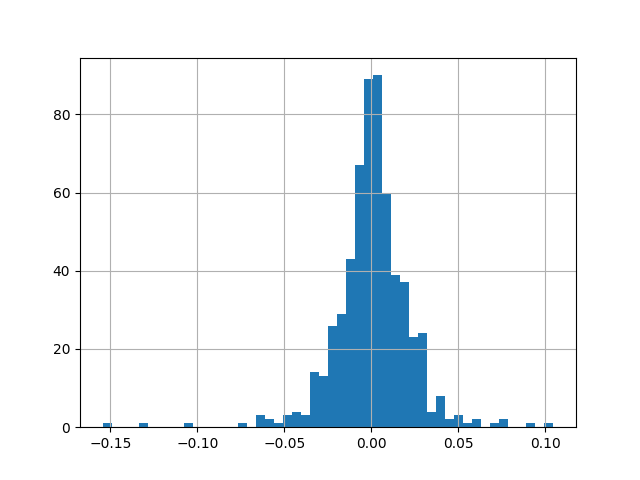

<AxesSubplot:>

In [27]:
fig, ax = plt.subplots()
log_return.hist(bins=50, ax=ax)

In [9]:
print(log_return.std())
print(log_return.mean())

0.021977163220747727
0.0006041454001648993


In [29]:
sharpe_ratio = log_return.mean()/log_return.std()
sharpe_ratio = sharpe_ratio*252**.5
print(sharpe_ratio)

0.4363853713935511


# Ahora, tomando pesos aleatorios

In [30]:
weight = np.random.random(4)
weight /= weight.sum()
weight

array([0.06421877, 0.56336454, 0.24962157, 0.12279511])

In [31]:
log_return2 = np.sum(np.log(data/data.shift())*weight, axis=1)
sharpe_ratio2 = log_return2.mean()/log_return2.std()
sharpe_ratio2 = sharpe_ratio2*252**.5
sharpe_ratio2

0.5220225336091617

In [32]:
# Simulación Monte-Carlo 

n = 5000

log_returns = np.log(data/data.shift())

weights = np.zeros((n, 4))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)

for i in range(n):
    weight = np.random.random(4)
    weight /= weight.sum()
    weights[i] = weight
    
    exp_rtns[i] = np.sum(log_returns.mean()*weight)*252
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_rtns[i] / exp_vols[i]

In [16]:
sharpe_ratios.max()

0.7844361134671382

In [17]:
sharpe_ratios.argmax()

2901

In [18]:
weights[3153]

array([0.12153432, 0.43896678, 0.25588522, 0.18361368])

<IPython.core.display.Javascript object>


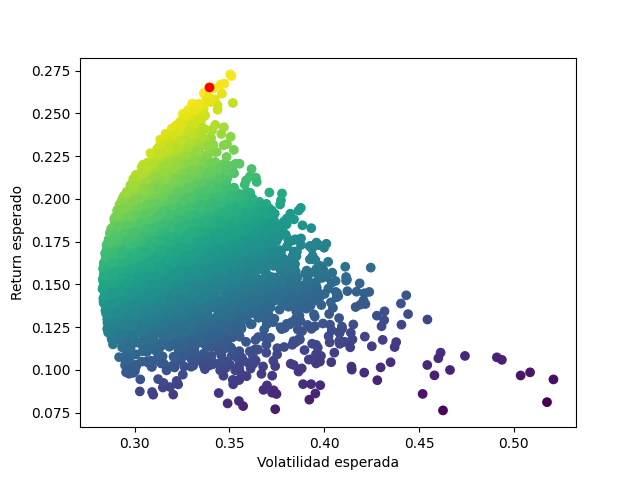

Text(0, 0.5, 'Return esperado')

In [34]:
fig, ax = plt.subplots()
ax.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='r')
ax.set_xlabel('Volatilidad esperada')
ax.set_ylabel('Return esperado')